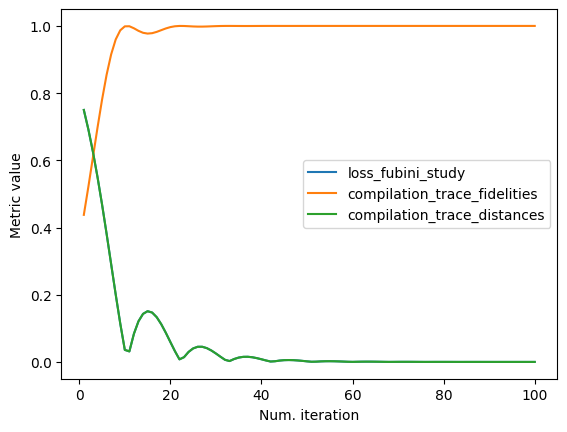

In [18]:
import qiskit
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import state, ansatz
from qiskit.circuit import ParameterVector
import numpy as np
def create_cx_rx(num_qubits):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    thetas = ParameterVector(
        'theta', 2 * num_qubits)
    t = 0
    for _ in range(num_qubits-1):
        i = np.random.randint(0, num_qubits - 1, size = 1)
        j = np.random.choice([x for x in range(num_qubits) if x != i])
        qc.cx(i, j)
        qc.rx(thetas[t], i)
        qc.rx(thetas[t+1], j)
        t += 2
    return qc

def ccx(num_qubits):

    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc.ccx(0, 1, 2)
    return qc

num_qubits = 3
u = create_cx_rx(num_qubits)
compiler = QuantumCompilation(
            u,
            vdagger = ccx(3).inverse(),
            optimizer = 'adam',
            metrics_func = [
                'loss_basic', 
                'compilation_trace_fidelities'
            ]
        )